In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_excel("/content/sample_data/glass.xlsx", sheet_name="glass")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (214, 10)
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [3]:
X = df.drop("Type", axis=1)
y = df["Type"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

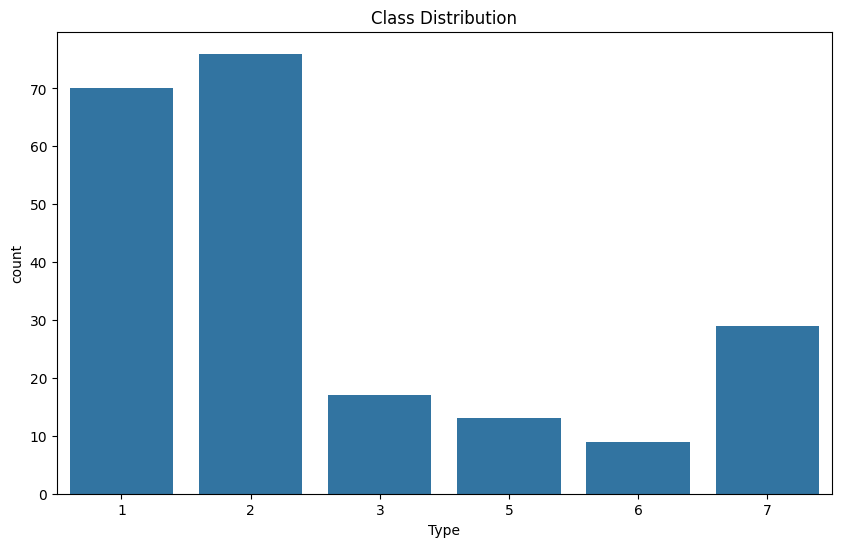

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

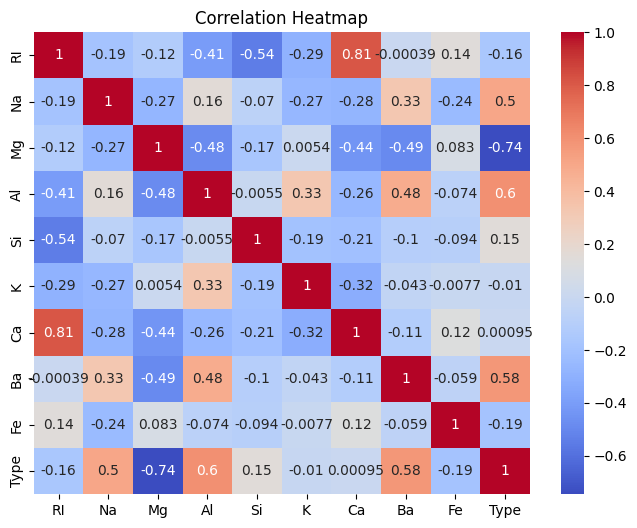

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [9]:
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.77      0.67      0.71        15
           3       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.73      0.77      0.74        43
weighted avg       0.75      0.74      0.74        43



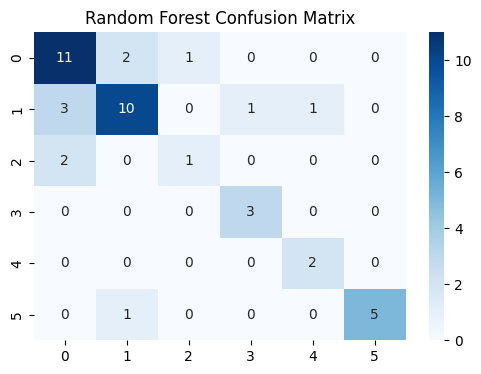

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [11]:
base_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [12]:
bag = BaggingClassifier(base_tree, n_estimators=100, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

In [13]:
ada = AdaBoostClassifier(base_tree, n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [14]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [15]:
results = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Bagging': accuracy_score(y_test, y_pred_bag),
    'AdaBoost': accuracy_score(y_test, y_pred_ada),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}

In [16]:
print("\nModel Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Model Comparison:
Random Forest: 0.7442
Bagging: 0.7209
AdaBoost: 0.6279
Gradient Boosting: 0.8372


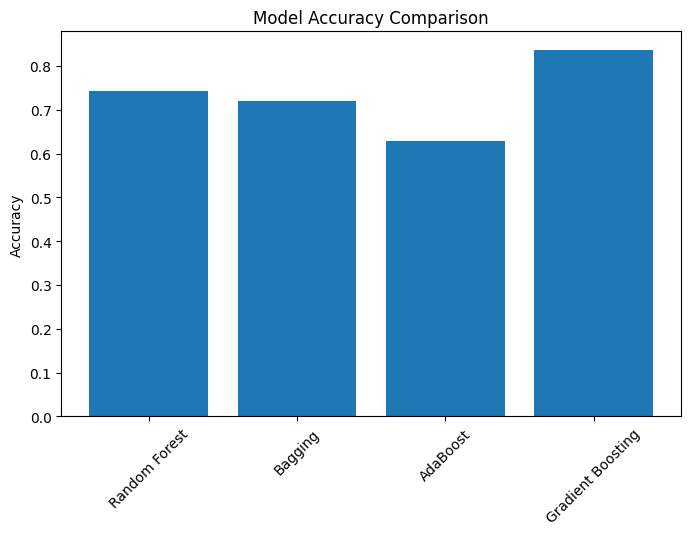

In [17]:
plt.figure(figsize=(8,5))
models = list(results.keys())
accuracies = list(results.values())
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

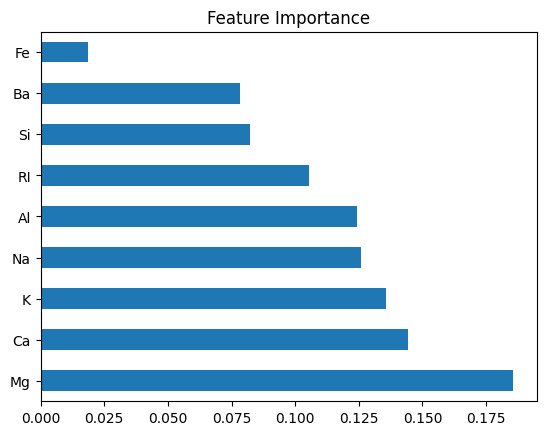

In [18]:
importances = pd.Series(rf.feature_importances_, index=df.drop("Type", axis=1).columns)
importances.sort_values(ascending=False).plot(kind='barh')
plt.title("Feature Importance")
plt.show()